In [1]:
import path
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import functools
from functools import lru_cache, cache

###### Get all files

In [2]:
files = glob.glob("**", recursive=True)
files = [f for f in files if os.path.isfile(f) and f[0] in list('0123456789')]

###### Histogram by types

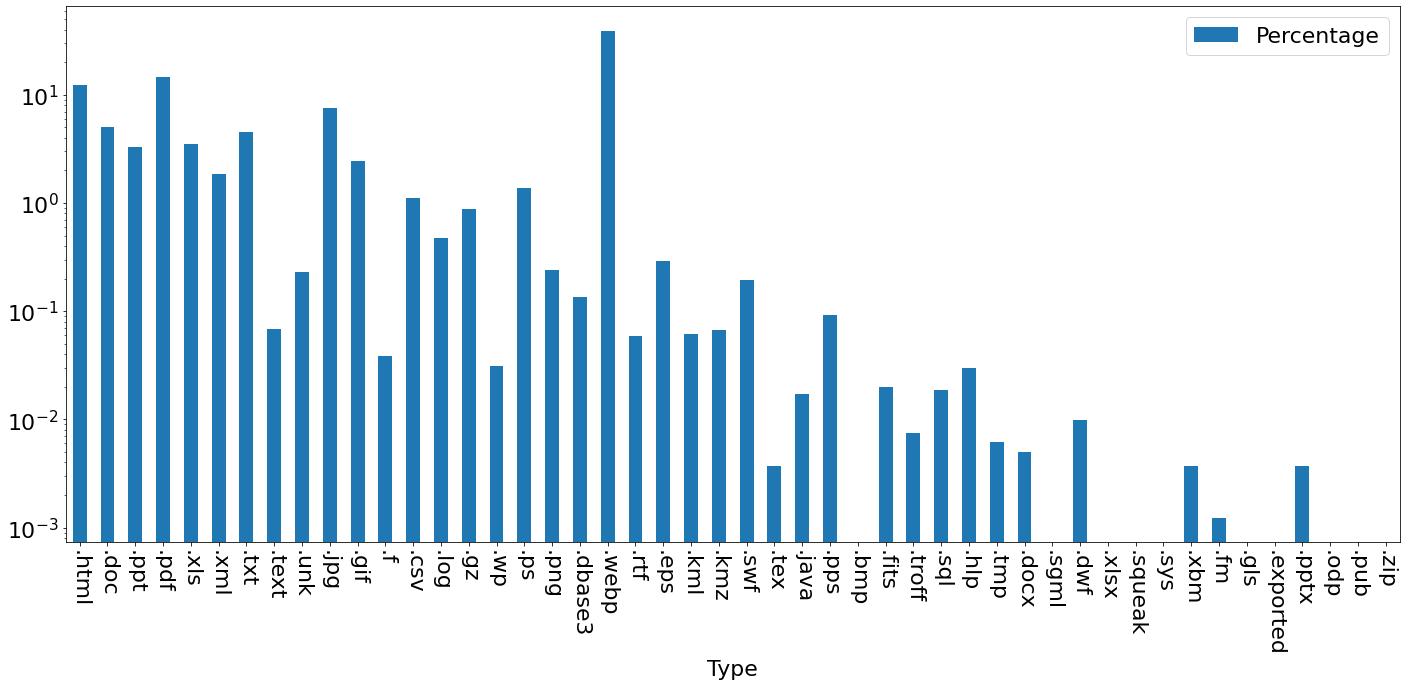

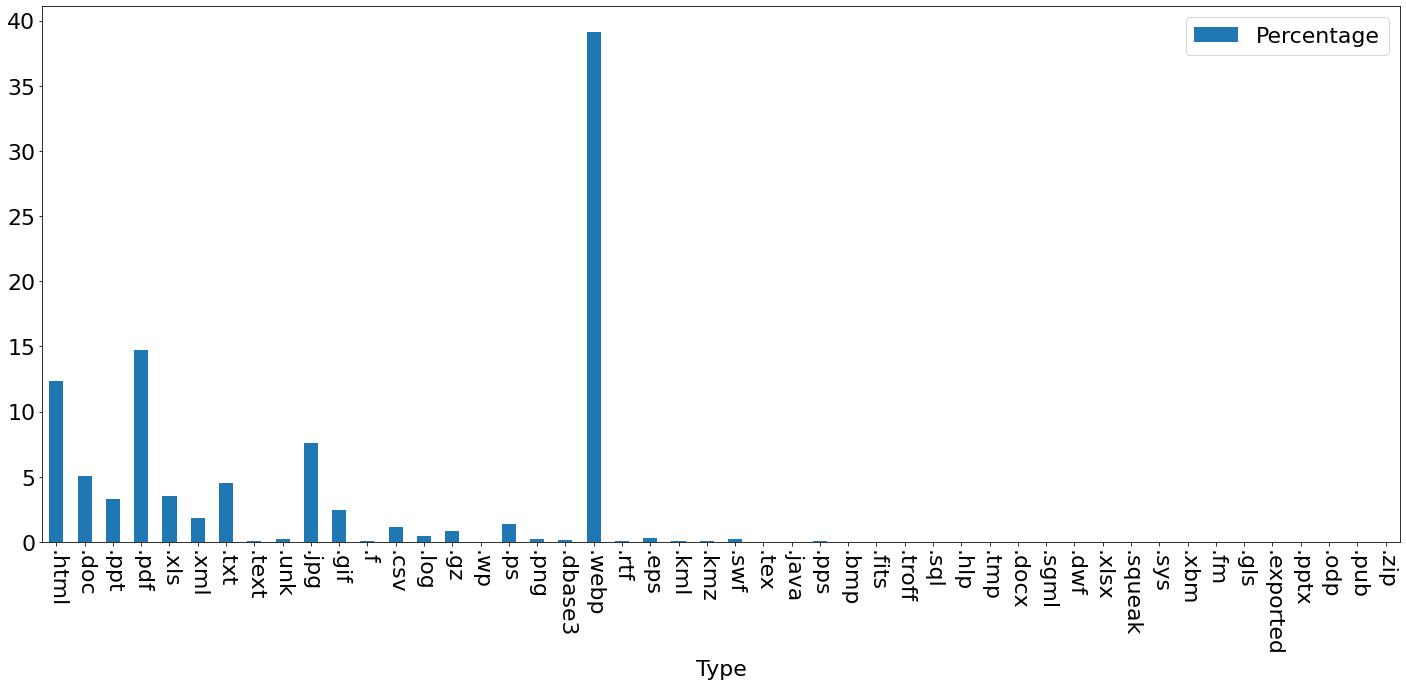

In [3]:
total_files = len(files)
extensions = list(map(lambda x: os.path.splitext(x)[-1], files))
histogram = {}
for ext in extensions:
    if ext in histogram:
        histogram[ext] += 1
    else:
        histogram[ext] = 0
s1 = pd.Series([k for k in histogram.keys()])
s2 = pd.Series([v for v in histogram.values()])
df = pd.DataFrame({"Type": s1, "Count": s2})

def plot_histogram(df):
    df["Percentage"] = df["Count"] / df["Count"].sum() * 100

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 22})

    #sns.barplot(x="Type", y="Percentage", data=df, log=True)
    df.plot.bar(x="Type", y="Percentage", logy=True)
    plt.xticks(rotation=-90)
    plt.tight_layout()
    plt.show()

    #sns.barplot(x="Type", y="Percentage", data=df, log=False)
    df.plot.bar(x="Type", y="Percentage")
    plt.xticks(rotation=-90)
    plt.tight_layout()
    plt.show()
    
plot_histogram(df)

##### Histogram by type (excluding webp)

/var/folders/z1/hfz3q2b52bx3hb8nh0z1q89c0000gp/T/ipykernel_94177/1639911070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Percentage"] = df["Count"] / df["Count"].sum() * 100


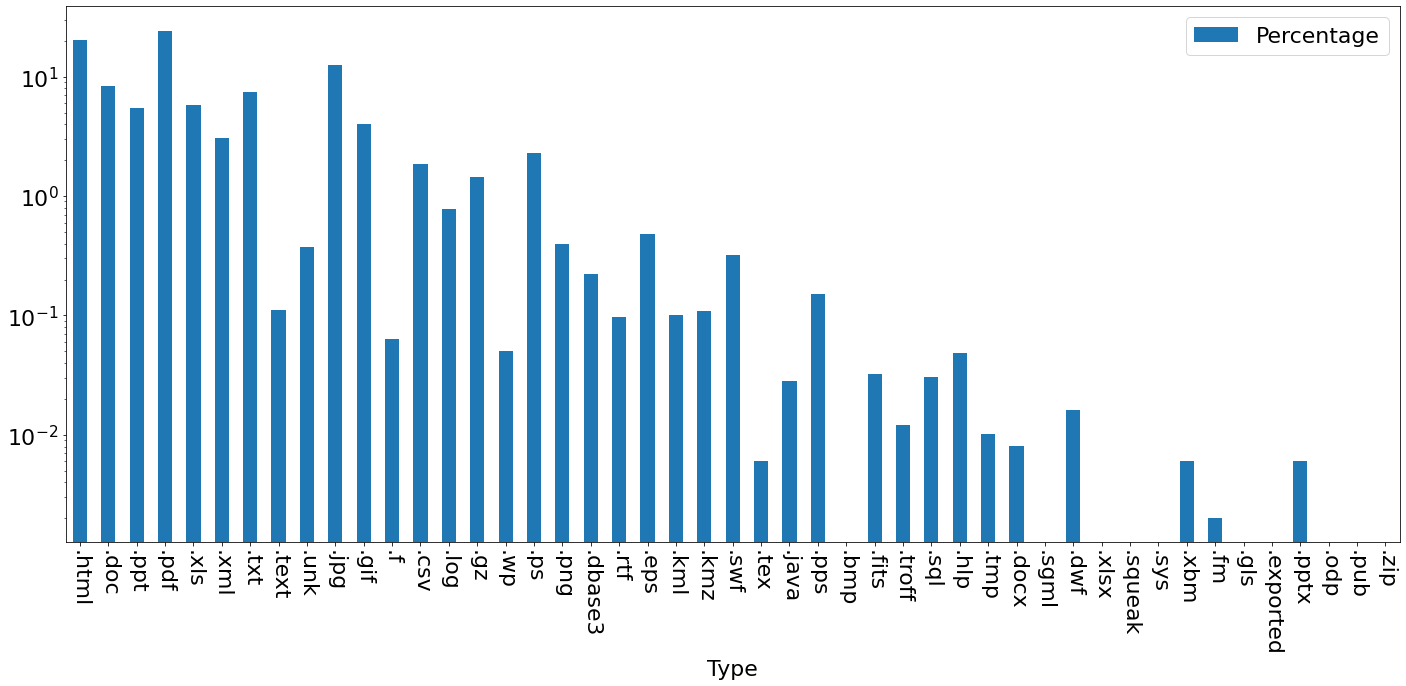

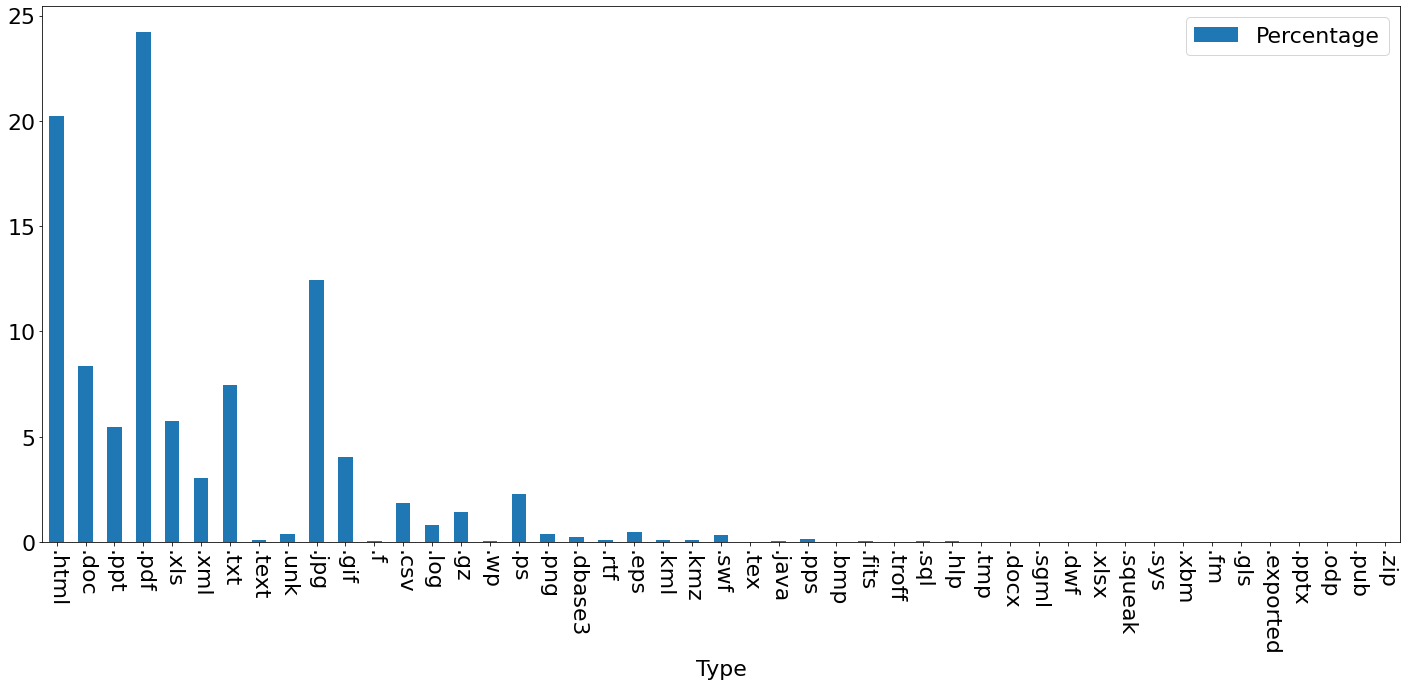

In [4]:
df2 = df[df["Type"] != ".webp"]
plot_histogram(df2)

##### Histogram of file sizes (size in log scale)

In [5]:
@lru_cache
def get_file_size(x):
    try:
        return os.stat(x).st_size
    except Exception:
        return 0

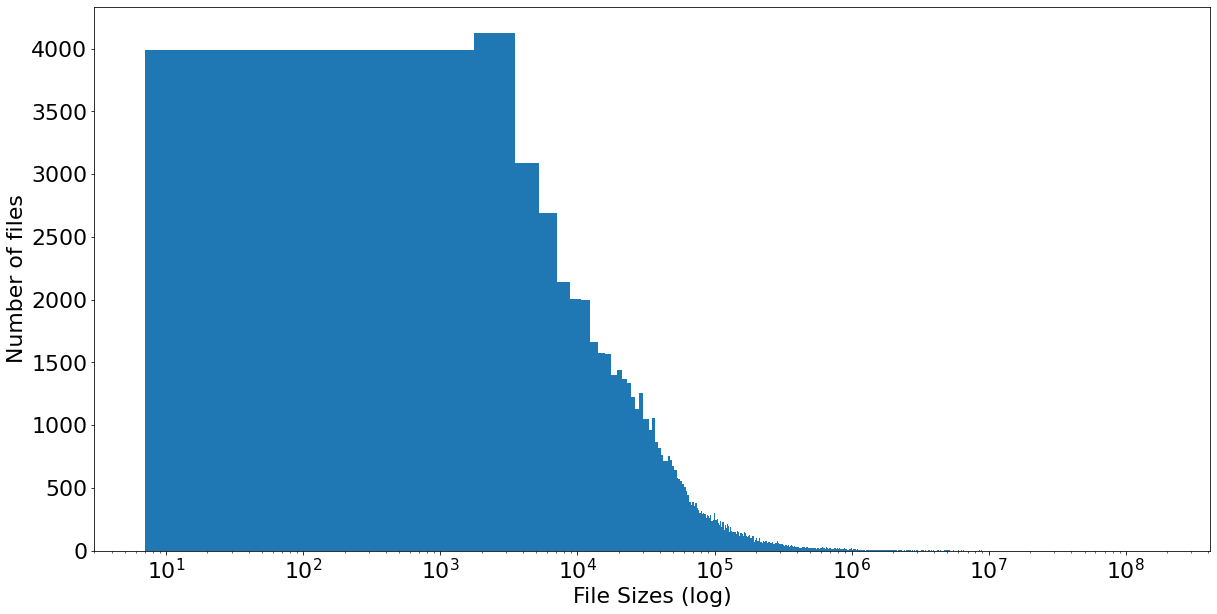

In [9]:
file_sizes = list(map(get_file_size, files))
s1 = pd.Series(files)
s2 = pd.Series(file_sizes)
df = pd.DataFrame({"Filename": s1, "File Size": s2})
ax = df["File Size"].plot(kind="hist", logx=True, bins=100_000)
ax.set_xlabel("File Sizes (log)")
ax.set_ylabel("Number of files")
plt.show()

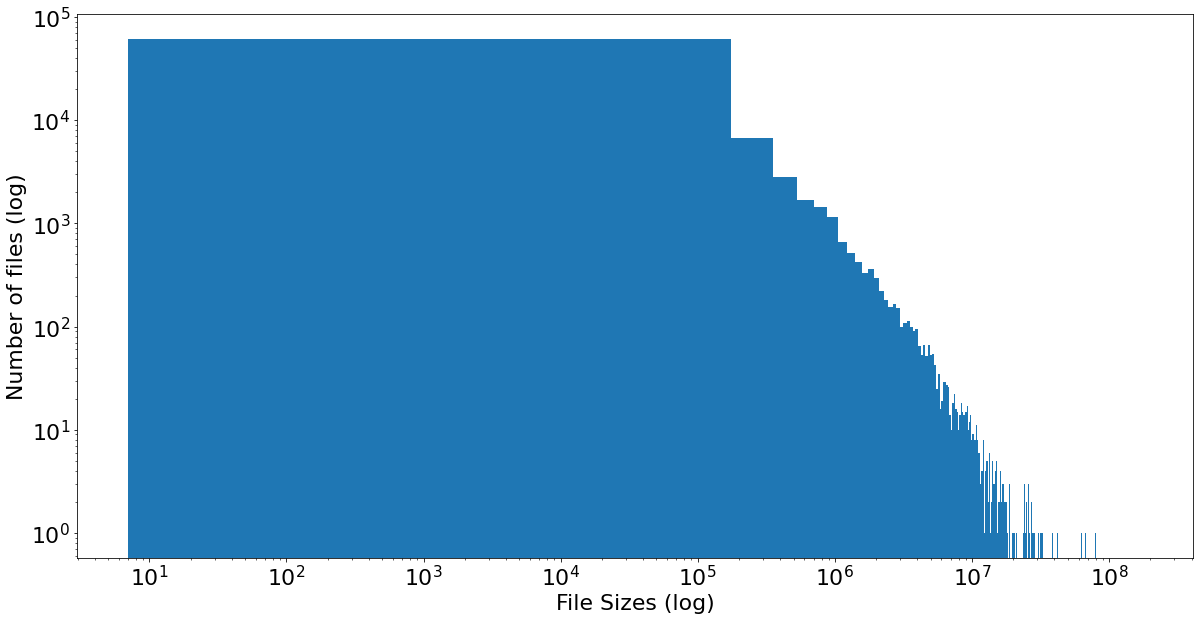

In [8]:
file_sizes = list(map(get_file_size, files))
s1 = pd.Series(files)
s2 = pd.Series(file_sizes)
df = pd.DataFrame({"Filename": s1, "File Size": s2})
ax = df["File Size"].plot(kind="hist", logx=True, logy=True, bins=1000)
ax.set_xlabel("File Sizes (log)")
ax.set_ylabel("Number of files (log)")
plt.show()

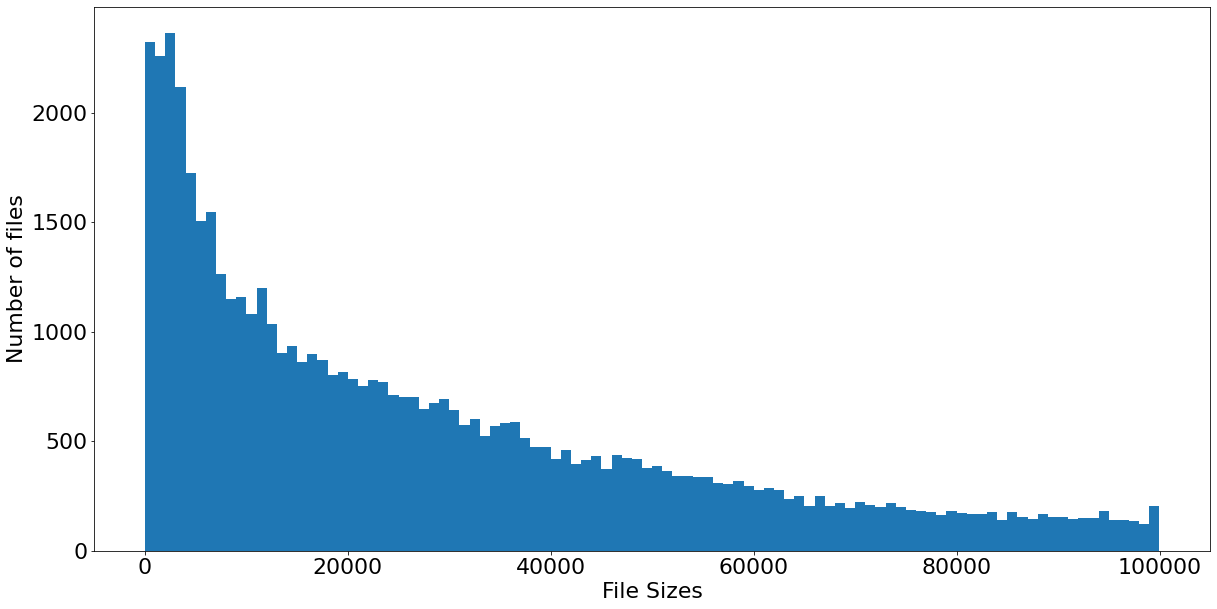

In [17]:
file_sizes = list(map(get_file_size, files))
s1 = pd.Series(files)
s2 = pd.Series(file_sizes)

df = pd.DataFrame({"Filename": s1, "File Size": s2})
df = df[df["File Size"] < 100_000]
ax = df["File Size"].plot(kind="hist", bins=100)
ax.set_xlabel("File Sizes")
ax.set_ylabel("Number of files")
plt.show()